In [18]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from knn_weights import *
from matplotlib.colors import ListedColormap

from space_metric import *
from knn_plot import *
from knn_tests import *
from knn_weights import *

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn as sns
from knn_classifier_class import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=41)

In [20]:
knn_classifier = KnnPowerClassifier(get_dst_metric(2), triangular_window, 100, 30)

In [21]:
knn_classifier.fit(X_train, y_train)

In [22]:
prediction = knn_classifier.predict(X_test)

In [23]:
def test_knn(x_test, y_test):
    prediction = knn_classifier.predict(x_test)
    accuracy = compute_accuracy(prediction, y_test)
    print(accuracy)

In [24]:
test_knn(X_test, y_test)
test_knn(X_test, y_test)

1.0
1.0


In [25]:
knn_classifier = KnnPowerClassifier(get_dst_metric(2), triangular_window, 100, 30)
knn_classifier.fit(X_train, y_train)
prediction = knn_classifier.predict(X_test)
accuracy = compute_accuracy(prediction, y_test)
print(accuracy)

knn_classifier.reduce()

prediction = knn_classifier.predict(X_test)
accuracy = compute_accuracy(prediction, y_test)
print(accuracy)


1.0
1.0


In [30]:
knn_classifier = KnnPowerClassifier(get_dst_metric(2), triangular_window, 100, 30)
knn_classifier.fit(X_train, y_train)
prediction = knn_classifier.predict(X_test)
accuracy = compute_accuracy(prediction, y_test)
print(accuracy)

knn_classifier.reduce()

prediction = knn_classifier.predict(X_test)
accuracy = compute_accuracy(prediction, y_test)
print(accuracy)

1.0
1.0


In [36]:
accuracy_no_reduce = []
accuracy_reduce = []

for i in range(10):
    X_shuffled, y_shuffled = shuffle(X_train, y_train)
    knn_classifier = KnnPowerClassifier(get_dst_metric(2), triangular_window, 100, 10)
    knn_classifier.fit(X_shuffled, y_shuffled)
    
    prediction = knn_classifier.predict(X_test)
    accuracy = compute_accuracy(prediction, y_test)
    accuracy_no_reduce.append(accuracy)
    
    knn_classifier.reduce()

    prediction = knn_classifier.predict(X_test)
    accuracy = compute_accuracy(prediction, y_test)
    accuracy_reduce.append(accuracy)

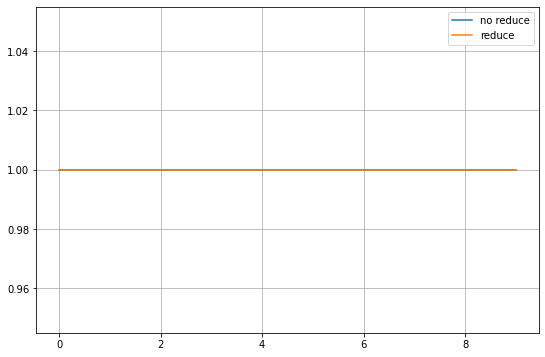

In [34]:
plt.rcParams['figure.figsize'] = [9, 6]

plt.plot(accuracy_no_reduce, label='no reduce')
plt.plot(accuracy_reduce, label='reduce')

plt.legend()
plt.grid()
plt.show()